In [631]:
import networkx as nx
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


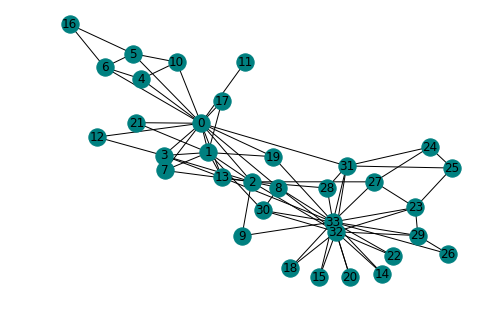

In [760]:
#G = nx.read_graphml('VKgraph.graphml') #loading my vk network
G = nx.karate_club_graph()
nx.draw(G, node_color='teal',pos=nx.spring_layout(G), with_labels = True)
A = nx.adjacency_matrix(G)

In [761]:
#матрица с рандомными весами, распределение степеней P(k_i)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        W[i,j] = A[i,j] * (random.randrange(3) + 1)

deg = list(nx.degree(G))
degrees = np.zeros(len(deg), dtype = int)
for i in range(len(deg)):
    degrees[i] = deg[i][1]
weights = W.sum(axis=0)
weights = np.array(weights)
weights = weights.flatten()
print(degrees)

[16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5
  3  3  2  4  3  4  4  6 12 17]


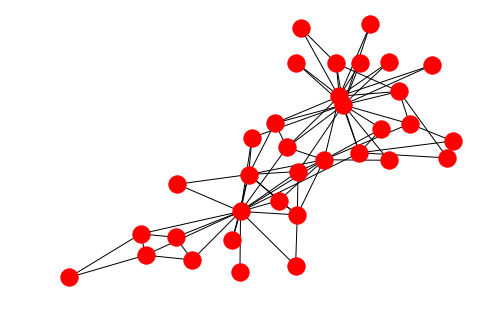

In [762]:
nx.draw(G1)

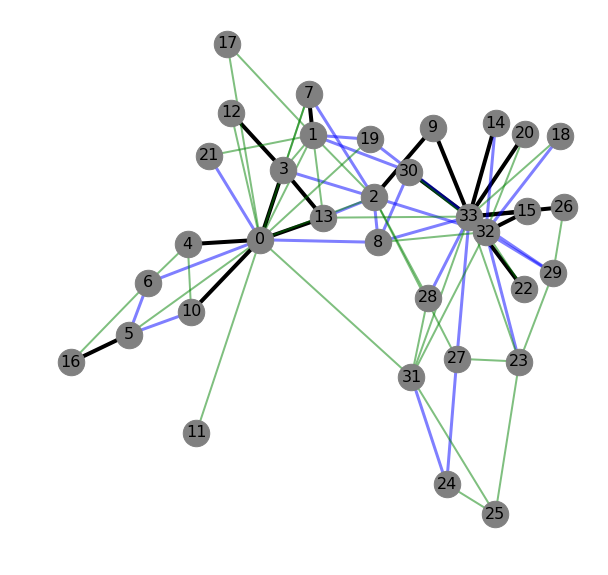

In [786]:
G1 = nx.Graph()

for i in range(len(G)):
    G1.add_node(i)

for i in range(len(G)):
    for j in range(len(G)):
        if A[i,j] == 1:
            G1.add_edge(i,j, weight = W[i,j])         


elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] == 3]
emedium = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] == 2]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] == 1]


plt.figure(figsize=(10,10))
pos = nx.spring_layout(G1)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=700, node_color = 'grey')

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge, width=4, edge_color = 'black')
nx.draw_networkx_edges(G1, pos, edgelist=emedium, width=3, alpha=0.5, edge_color='blue')
nx.draw_networkx_edges(G1, pos, edgelist=esmall,width=2, alpha=0.5, edge_color='green')

# labels
nx.draw_networkx_labels(G1, pos, font_size=16, font_family='sans-serif')


plt.axis('off')
plt.show()

In [785]:
dc = nx.degree_centrality(G)

## First Article

-----------------------------------------------------------

In [766]:
pk = np.zeros(np.max(degrees))
pk_norm = np.zeros(np.max(degrees))

for i in range (len(deg)):
    pk[degrees[i] - 1] = pk[degrees[i] - 1] + 1
    
pk_norm = pk/len(deg) 

print(pk_norm)

lamb = np.zeros(len(G))
for i in range(len(G)):
    for j in range(degrees[i]):
        lamb[i] = lamb[i] + pk_norm[j]
        #if (pk_norm[j] <= pk_norm[degrees[i] - 1]):
         #   lamb[i] = lamb[i] + pk_norm[j]   
print(lamb)  

[0.02941176 0.32352941 0.17647059 0.17647059 0.08823529 0.05882353
 0.         0.         0.02941176 0.02941176 0.         0.02941176
 0.         0.         0.         0.02941176 0.02941176]
[0.97058824 0.88235294 0.91176471 0.85294118 0.52941176 0.70588235
 0.70588235 0.70588235 0.79411765 0.35294118 0.52941176 0.02941176
 0.35294118 0.79411765 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.52941176 0.35294118 0.35294118 0.35294118 0.79411765
 0.52941176 0.52941176 0.35294118 0.70588235 0.52941176 0.70588235
 0.70588235 0.85294118 0.94117647 1.        ]


In [767]:
# mu =0.5, eps = 0.5
sigma = np.max(degrees) - np.min(degrees) + 1
delta = np.max(weights) - np.min(weights) + 1

In [768]:
mdh = np.zeros(len(G))
mdl = np.zeros(len(G))
mwh = np.zeros(len(G))
mwl = np.zeros(len(G))
mdSigma = np.zeros(len(G))
mwSigma = np.zeros(len(G))

mh = np.zeros(len(G))
ml = np.zeros(len(G))
mSigma = np.zeros(len(G))

mdh = lamb * np.abs(degrees - np.min(degrees))/sigma
mdl = (1 - lamb) * np.abs(degrees - np.max(degrees))/sigma

mwh = np.abs(weights - np.min(weights))/delta
mwl = np.abs(weights - np.max(weights))/delta

mdSigma = 1 - mdh - mdl
mwSigma = 1 - mwh - mwl

print(mwh)
print(mwl)
print(mwSigma)

[0.76470588 0.38235294 0.55882353 0.32352941 0.08823529 0.23529412
 0.23529412 0.20588235 0.20588235 0.08823529 0.20588235 0.
 0.02941176 0.23529412 0.11764706 0.14705882 0.08823529 0.11764706
 0.05882353 0.11764706 0.08823529 0.08823529 0.08823529 0.14705882
 0.11764706 0.11764706 0.08823529 0.14705882 0.08823529 0.20588235
 0.26470588 0.26470588 0.64705882 0.97058824]
[0.20588235 0.58823529 0.41176471 0.64705882 0.88235294 0.73529412
 0.73529412 0.76470588 0.76470588 0.88235294 0.76470588 0.97058824
 0.94117647 0.73529412 0.85294118 0.82352941 0.88235294 0.85294118
 0.91176471 0.85294118 0.88235294 0.88235294 0.88235294 0.82352941
 0.85294118 0.85294118 0.88235294 0.82352941 0.88235294 0.76470588
 0.70588235 0.70588235 0.32352941 0.        ]
[0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 

In [769]:
def D_Sh_comb(x1, y1, xy1, x2, y2, xy2):
    k = x1*y2 + x2*y1
    return ((x1*x2 + x1*xy2 + x2*xy1)/(1-k), (y1*y2 + y1*xy2 + y2*xy1)/(1-k), (xy1*xy2)/(1-k))


#print(D_Sh_comb(mdh, mdl, mdSigma, mwh[0], mwl[0], mwSigma[0]))


In [770]:
for i in range(len(G)):
    (mh[i], ml[i], mSigma[i]) = D_Sh_comb(mdh[i], mdl[i], mdSigma[i], mwh[i], mwl[i], mwSigma[i])

In [771]:
mec = mh - ml

mec = (np.abs(np.min(mec)) + mec)/(len(G) * np.abs(np.min(mec)) + np.sum(mec))

In [772]:
q = np.zeros(len(G))
esc = np.zeros(len(G))
A2 = np.dot(A, A)

A_2path = np.sign(A + A2 + np.identity(len(G)))

for i in range(len(G)):
    for j in range(len(G)):
        q[i] = q[i] + A_2path[i, j] * mec[i]

for i in range(len(G)):
    for j in range(len(G)):
        esc[i] = esc[i] + A[i, j] * q[i]

print(esc)        

[51.66836486 13.8604325  28.69316481  6.82966244  0.48163264  2.11764397
  2.11764397  2.27699232  4.61077591  0.27658212  1.07994068  0.
  0.08218926  5.21233347  0.30041574  0.37494036  0.07215186  0.28460439
  0.15900309  1.07888043  0.22848088  0.21645557  0.22848088  2.30479488
  0.34802594  0.34802594  0.21645557  1.88737547  0.66893422  2.06999302
  3.29730188  8.20307863 32.26250498 52.66359657]


In [773]:
esc1 = np.sort(esc)
esc1

array([ 0.        ,  0.07215186,  0.08218926,  0.15900309,  0.21645557,
        0.21645557,  0.22848088,  0.22848088,  0.27658212,  0.28460439,
        0.30041574,  0.34802594,  0.34802594,  0.37494036,  0.48163264,
        0.66893422,  1.07888043,  1.07994068,  1.88737547,  2.06999302,
        2.11764397,  2.11764397,  2.27699232,  2.30479488,  3.29730188,
        4.61077591,  5.21233347,  6.82966244,  8.20307863, 13.8604325 ,
       28.69316481, 32.26250498, 51.66836486, 52.66359657])

In [774]:
x1, = np.where(esc == np.max(esc))
esc[x1[0]] = 0
#x2, = np.where(esc == 5.27062573e+01)
x2, = np.where(esc == np.max(esc))
esc[x2[0]] = 0
#x3, = np.where(esc == 2.89545178e+01)
x3, = np.where(esc == np.max(esc))
print(x1, x2, x3)

[33] [0] [32]


## Другие меры центральности

DegreeView({0: 27, 1: 13, 2: 17, 3: 13, 4: 5, 5: 8, 6: 6, 7: 7, 8: 9, 9: 6, 10: 6, 11: 1, 12: 4, 13: 10, 14: 5, 15: 6, 16: 4, 17: 2, 18: 3, 19: 5, 20: 4, 21: 3, 22: 4, 23: 6, 24: 5, 25: 3, 26: 4, 27: 6, 28: 4, 29: 6, 30: 8, 31: 7, 32: 20, 33: 37})

In [826]:
def top_centr(func):
    k_c = func
    k_c = sorted(k_c.items(), key=operator.itemgetter(1), reverse=True)
    for i in range (0,3):
        fr = k_c[i][0]
        print(k_c[i][0], k_c[i][1])

In [801]:
k_c = nx.degree(G1, weight='weight')
k_c = dict(k_c)
k_c = sorted(k_c.items(), key=operator.itemgetter(1), reverse=True)
for i in range (0,3):
    fr = k_c[i][0]
    print(k_c[i][0], k_c[i][1])

33 37
0 27
32 20


In [815]:
g_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G1.edges(data='weight')}
nx.set_edge_attributes(G1, g_distance_dict, 'distance')

In [827]:
top_centr(nx.closeness_centrality(G1, distance = 'weight')) #weighted

0 0.4230769230769231
31 0.4177215189873418
2 0.38372093023255816


In [828]:
top_centr(nx.betweenness_centrality(G1, weight = 'weight')) #weighted

0 0.4865214646464646
31 0.320852873977874
32 0.2309283309283309


In [829]:
top_centr(nx.eigenvector_centrality_numpy(G1, weight='weight')) #weighted

33 0.49614781804122077
32 0.32212290186175174
2 0.2698718097110071


In [831]:
top_centr(nx.katz_centrality_numpy(G1, normalized=True, weight='weight')) #weighted

33 0.5597765903986865
32 0.3586627843414147
15 0.24787322000781106


In [832]:
top_centr(nx.pagerank(G1, weight='weight')) #weighted


33 0.12162194641611189
0 0.09491749964259673
32 0.06701714410458624


In [824]:
def top_centr(func):
    k_c = func(G)
    k_c = sorted(k_c.items(), key=operator.itemgetter(1), reverse=True)
    for i in range (0,3):
        fr = k_c[i][0]
        print(k_c[i][0], k_c[i][1])
top_centr(nx.closeness_centrality) #not weighted

0 0.5689655172413793
2 0.559322033898305
33 0.55


## Second Article

In [835]:
I1 = np.zeros((len(G), len(G))) #количество общих соседей
I2 = np.zeros((len(G), len(G))) #разность степеней
mI1 = np.zeros((len(G), len(G)))
mI2 = np.zeros((len(G), len(G)))
mP1 = np.zeros((len(G), len(G)))
mP2 = np.zeros((len(G), len(G)))
mSigma1 = np.ones((len(G), len(G)))
mSigma2 = np.ones((len(G), len(G)))

for i in range(len(G)):
    for j in range(len(G)):
        for k in range(len(G)):
            I1[i, j] = I1[i, j] + A[i, k] * A[j, k]

for i in range(len(G)):
    for j in range(len(G)):
        I2[i,j] = np.abs(degrees[i] - degrees[j])
        #k = degrees[i] - degrees[j]
        #if (k > 0):
         #   I2[i, j] = k
            
I1 = I1/np.max(I1)
I2 = I2/np.max(I2)
            
print(I2)       
        

[[0.     0.4375 0.375  ... 0.625  0.25   0.0625]
 [0.4375 0.     0.0625 ... 0.1875 0.1875 0.5   ]
 [0.375  0.0625 0.     ... 0.25   0.125  0.4375]
 ...
 [0.625  0.1875 0.25   ... 0.     0.375  0.6875]
 [0.25   0.1875 0.125  ... 0.375  0.     0.3125]
 [0.0625 0.5    0.4375 ... 0.6875 0.3125 0.    ]]


In [836]:
mI1 = (I1 - np.min(I1))/(np.max(I1) - np.min(I1))
mP1 = (np.max(I1) - I1)/(np.max(I1) - np.min(I1))

mI2 = (I2 - np.min(I2))/(np.max(I2) - np.min(I2))
mP2 = (np.max(I2) - I2)/(np.max(I2) - np.min(I2))

mSigma1 = mSigma1 - mI1 - mP1
mSigma2 = mSigma2 - mI2 - mP2

print(mSigma1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [837]:
delta = np.zeros((len(G), len(G)))
alpha = np.zeros((len(G), len(G)))
lambd = 5 ##?????
D = np.array([[0,0,0,0],[0,1,0, 0.5],[0,0,1,0.5],[0, 0.5, 0.5, 1]])

for i in range(len(G)):
    for j in range(len(G)):
        m = (np.array([0, mI1[i,j] - mI2[i,j], mP1[i,j] - mP2[i,j], mSigma1[i,j] - mSigma2[i,j]]))
        delta[i,j] = np.sqrt(0.5 * np.dot(np.dot(m.T,D),m))
        alpha[i,j] = (1 - (delta[i,j])**lambd)**(1/lambd)

mI1 = alpha * mI1
mP1 = alpha * mP1
mI2 = alpha * mI2
mP2 = alpha * mP2

mSigma1 = np.ones((len(G), len(G))) - alpha * (np.ones((len(G), len(G))) - mSigma1)
mSigma2 = np.ones((len(G), len(G))) - alpha * (np.ones((len(G), len(G))) - mSigma2)

In [838]:
mI = np.zeros((len(G), len(G)))
mP = np.zeros((len(G), len(G)))
mSigma = np.ones((len(G), len(G)))

for i in range(len(G)):
    for j in range(len(G)):
        (mI[i], mP[i], mSigma[i]) = D_Sh_comb(mI1[i,j], mP1[i,j], mSigma1[i,j], mI2[i,j], mP2[i,j], mSigma2[i,j])

In [839]:
def influence(S, v, mI, A):
    A_inf = A + np.identity(A.shape[0])
    inf = 0
    if v in S:
        return 1
    for s in S:
        for i in range(A.shape[0]):
            inf = inf + mI[s, i] * mI[i, v] * A_inf[i, v] 
    return inf

In [840]:
def full_influence(S, mI, A):
    full_inf = 0
    for i in range(A.shape[0]):
        full_inf = full_inf + influence(S, i, mI, A)
    return full_inf

In [851]:
G.number_of_edges()

78

In [846]:
print(full_influence({33,4}, mI, A))

14.550721860108954


In [858]:
import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

In [878]:
S = {i for i in range(len(G))}

In [881]:
fi_max = 0
fs = {}
#for i in range(7):
i = 3
S1 = findsubsets(S, i)
for x in S1:
    fi = full_influence(x, mI, A)
    if (fi > fi_max):
        fi_max = fi
        fs = x
print(fi_max, fs)

69.0697673609468 (14, 15, 18)


In [882]:
full_influence({1,2,3,4,5,6,7}, mI, A)

66.58993149849665

## Third Article

In [889]:
A = A + np.identity(A.shape[0])

d_c = 3

p = np.zeros(len(G))
p_d = np.zeros(len(G))
delta = np.zeros(len(G))
d = np.zeros((len(G), len(G)))
p_temp = np.zeros(len(G))

for i in range(len(G)):
    for j in range(len(G)):
        d[i, j] = nx.shortest_path_length(G, source=i, target=j)
        #if (nx.shortest_path_length(G, source=i, target=j) - d_c < 0):
            #p[i] = p[i] + 1
        p_d[i] = p_d[i] + degrees[j] * A[i,j]

for i in range(len(G)):
    temp = 0
    for j in range(len(G)):
        temp = temp + d[i,j]**2 * A[i,j]
    temp = temp * (-1/degrees[i])   
    p[i] = np.exp(temp) + p_d[i]


p_max = np.max(p)

d_temp = d + np.identity(len(G)) * 10000 #?????????
for i in range(len(G)):
        if (p[i] == p_max):
            delta[i] = np.max(d[i,:])
        else:
            for j in range(len(G)):
                if (p[j] > p[i]):
                    p_temp[j] = 1
                else:
                    p_temp[j] = 10000
            delta[i] = np.min(d_temp[i, :] * p_temp)
            #delta[i] = 
            #p[i] = p[i] + 1
            
p = p/np.max(p)
delta = delta/np.max(delta)

print(p)
print(delta)

[1.         0.71886381 0.89457393 0.61343774 0.30887354 0.34401557
 0.34401557 0.53143969 0.75400584 0.34401557 0.30887354 0.20344747
 0.28544553 0.74229183 0.36744358 0.36744358 0.12144942 0.32058755
 0.36744358 0.53143969 0.36744358 0.32058755 0.36744358 0.53143969
 0.19173347 0.20344747 0.27373152 0.46115564 0.42601362 0.47286965
 0.55486771 0.70714981 0.85943191 0.96485798]
[1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.66666667]


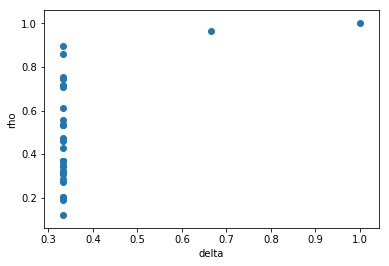

In [890]:
#plt.plot(delta, p)

fig, ax = plt.subplots()
ax.scatter(delta, p)
plt.xlabel("delta")
plt.ylabel("rho")

plt.show()

2 clusters: вершины 0, 33



In [891]:
V_c = {0,33}
V_done = {0, 33}
V_c_classes = np.zeros(len(G))
V_c_classes_num = np.zeros(len(G))
#сделать дикт с классами

j = 1
for i in range(len(G)):
    if i in V_c:
        V_c_classes[i] = 1
        V_c_classes_num[i] = j
        j = j + 1

In [892]:
len(V_c)

2

In [893]:
m = np.zeros((len(G), 2 ** len(V_c) - 1))
print(m.shape)
for i in range(len(G)):
    if i in V_c:
        x = V_c_classes_num[i] - 1
        m[i, int(x)] = 1
    else:
        m[i, m.shape[1] - 1] = 1       

(34, 3)


In [894]:
d2 = d * d
A_temp = np.array(A[9, :])
A_temp = A_temp.flatten()
print(A_temp)
print(V_c_classes * A_temp)
x, = np.where(V_c_classes * A_temp == 1)
x[0]

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


33

In [895]:
#one link with one center

for i in range(len(G)):
    if i not in V_c:
        A_temp = np.array(A[i, :])
        A_temp = A_temp.flatten()
        A_temp = V_c_classes * A_temp
        if (np.sum(A_temp) == 1):
            print(i)
            V_done.add(i)
            #gamma = 1/np.median(d2[i,:])
            x, = np.where((A_temp) == 1)
            #print(x, np.sum(A_temp), i, A_temp)
            x = x[0]
            #x = 0, x = 33
            alpha = np.exp(-gamma*d2[i,x])
            m[i, int(V_c_classes_num[x]) - 1] = alpha
            m[i, m.shape[1] - 1] = 1 - alpha
        #обобщить
        if (np.sum(A_temp) == 2):
            print(i)
            V_done.add(i)
            omega = np.exp(np.var((d[i,0], d[i,33])))
            m[i, m.shape[1] - 1] = 1
            
print(V_done)   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
17
18
19
20
21
22
23
26
27
28
29
30
31
32
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33}


In [888]:
print(S.difference(V_done))

{16, 24, 25}


In [904]:
A[16,:] #5 6 16 2/3
A[24,:] # 24 25-un 27 31 2/4
A[25, :] # 23 24 25 31 2/4
V_done
print(m[25,:], m[27,:], m[31,:])

[0. 0. 1.] [0.         0.77880078 0.22119922] [0. 0. 1.]


In [901]:
D_Sh_comb(0.77880078, 0., 0.22119922, 0.77880078,0., 0.22119922)

(0.9510709050713916, 0.0, 0.0489290949286084)

In [905]:
D_Sh_comb(0, 0, 1, 0,0, 1)

(0.0, 0.0, 1.0)

In [903]:
m[16, :] = (0.9510709050713916, 0.0, 0.0489290949286084)
m

array([[1.        , 0.        , 0.        ],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.        , 0.77880078, 0.22119922],
       [0.95107091, 0.        , 0.04892909],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.77880078, 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.

In [910]:
print((m[25][0]*2/3, m[25][1]*2/3, 1/3 + m[25][2]*2/3))
print((m[27][0]*2/3, m[27][1]*2/3, 1/3 + m[27][2]*2/3))
print((m[31][0]*2/3, m[31][1]*2/3, 1/3 + m[31][2]*2/3))

(0.0, 0.0, 1.0)
(0.0, 0.5192005220476033, 0.48079947795239675)
(0.0, 0.0, 1.0)


In [912]:
def DP_comb(x1,y1,xy1,x2,y2,xy2):
    return ((x1*x2, y1*y2, x1*y2 + x1*xy2 + y1*x2 + y1*xy2 + xy1*x2 + xy1*y2 + xy1*xy2))    

In [913]:
DP_comb(0.0, 0.0, 1.0, 0.0, 0.5192005220476033, 0.48079947795239675)

(0.0, 0.0, 1.0)

In [914]:
DP_comb(0,0,1,0,0,1)

(0, 0, 1)

In [926]:
m

array([[1.        , 0.        , 0.        ],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.        , 0.77880078, 0.22119922],
       [0.95107091, 0.        , 0.04892909],
       [0.77880078, 0.        , 0.22119922],
       [0.        , 0.77880078, 0.22119922],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77880078, 0.22119922],
       [0.77880078, 0.        , 0.22119922],
       [0.

In [927]:
np.max(m[0,:])

1.0

In [936]:
V_1 = []
V_2 = []
V_3 = []
classes = np.zeros(len(G))
for i in range(len(G)):
    if ((np.max(m[i,:])) == m[i,0]):
        V_1.append(i)
    else:
        if ((np.max(m[i,:])) == m[i,1]):
            V_2.append(i)
        else:
            V_3.append(i)
print(V_1, V_2, V_3)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 21] [9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 32, 33] [8, 13, 19, 24, 25, 31]


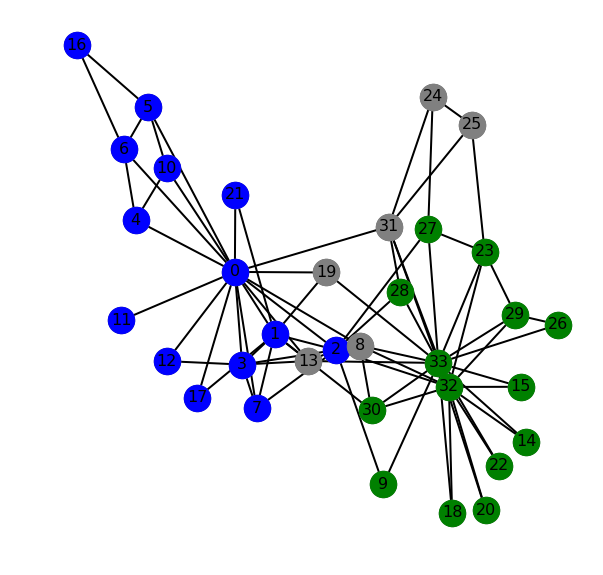

In [938]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=700, node_color = 'grey')

nx.draw_networkx_nodes(G,pos,
                       nodelist=V_1,
                       node_color='blue',
                       node_size=700)
nx.draw_networkx_nodes(G,pos,
                       nodelist=V_2,
                       node_color='green',
                       node_size=700)

nx.draw_networkx_nodes(G,pos,
                       nodelist=V_3,
                       node_color='grey',
                       node_size=700)

# edges
nx.draw_networkx_edges(G, pos, width=2, edge_color = 'black')


# labels
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')


plt.axis('off')
plt.show()




In [940]:
DP_comb(1,0,0, 0,0,1)

(0, 0, 1)